In [3]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

in Blender 3D view, 1 unit scale = 0.01 km ? need to confirm scaling.

In [85]:
class point:
    """
    initializes a point with x, y, and z components
    """
    def __init__(self, x,y,z):
        self.x = x
        self.y = y
        self.z = z
        
class body():
    """
    initializes a body with mass, velocity, location, and name
    """
    def __init__(self, location, mass, velocity, name=""):
        self.location=location
        self.mass=mass
        self.velocity=velocity
#         self.radius=radius #can define in Blender sphere function
        self.name=name
    

In [139]:
def calculate_acceleration(bodies,ref_index):
    """
    calculates the gravitational acceleration a_g = F_g/m_i = Σ-Gm_j/r_ij^3
    the reference target body experiences due to the other perturbing bodies
    where G is gravitational constant 6.67430 (± 0.00015)e-11 kg-1 m3 s-2
    """
    G=6.674e-20 #km3 kg-1 s-2
    target=bodies[ref_index]
    acceleration=point(0,0,0)
    for other_index, body in enumerate(bodies):
        if ref_index != other_index:
        # when target body i != other body j
            r = np.sqrt(((target.location.x -body.location.x)**2 + (target.location.y -body.location.y)**2 + (target.location.z -body.location.z)**2))
            a_g = -G * body.mass / r**3 #is this the correct acceleration equation?
            acceleration.x += a_g * (body.location.x-target.location.x) 
            acceleration.y += a_g * (body.location.y-target.location.y)
            acceleration.z += a_g * (body.location.z-target.location.z)
#     print(target.name,acceleration.y)
    return acceleration   

def calculate_velocity(bodies,timestep):
    """
    calculates the new velocity caused by the gravitational acceleration 
    and adds it to the current velocity
    """
    for ref_index, target in enumerate(bodies):
            acceleration=calculate_acceleration(bodies,ref_index)
            target.velocity.x += acceleration.x * timestep
            target.velocity.y += acceleration.y * timestep
            target.velocity.z += acceleration.z * timestep
            
def update_locations(bodies,timestep):
    """
    updates the location for ALL bodies by adding the calculated
    distance traveled in a time step to the current location 
    """
    for target in bodies:
        target.location.x += target.velocity.x * timestep
        target.location.y += target.velocity.y * timestep
        target.location.z += target.velocity.z * timestep

def advance_gravity(bodies,timestep):
    """
    computes the gravity for each time step and advances the simulation
    """
#     for ref_index, target in enumerate(bodies): #already call this before 
    calculate_velocity(bodies,timestep=timestep)
    update_locations(bodies,timestep=timestep)
        

In [ ]:
def simulation(bodies,timestep,totalsteps):
    #
    body_locations = []
    for current_body in bodies:
        body_locations.append({"x":[],"y":[], "z":[], "name":current_body.name})
    for i in range(1,totalsteps):
        advance_gravity(bodies,timestep)
        if i%100 == 0:
            

In [6]:
#planet data (location (m), mass (kg), velocity (m/s)
sun = {"location":point(0,0,0), "mass":2e30, "velocity":point(0,0,0)}
mercury = {"location":point(0,5.7e10,0), "mass":3.285e23, "velocity":point(47000,0,0)}
venus = {"location":point(0,1.1e11,0), "mass":4.8e24, "velocity":point(35000,0,0)}
earth = {"location":point(0,1.5e11,0), "mass":6e24, "velocity":point(30000,0,0)}
mars = {"location":point(0,2.2e11,0), "mass":2.4e24, "velocity":point(24000,0,0)}
# jupiter = {"location":point(0,7.7e11,0), "mass":1e28, "velocity":point(13000,0,0)}
# saturn = {"location":point(0,1.4e12,0), "mass":5.7e26, "velocity":point(9000,0,0)}
# uranus = {"location":point(0,2.8e12,0), "mass":8.7e25, "velocity":point(6835,0,0)}
# neptune = {"location":point(0,4.5e12,0), "mass":1e26, "velocity":point(5477,0,0)}
# pluto = {"location":point(0,3.7e12,0), "mass":1.3e22, "velocity":point(4748,0,0)}

if __name__ == "__main__":

    #build list of planets in the simulation, or create your own
    bodies = [
        body( location = sun["location"], mass = sun["mass"], velocity = sun["velocity"], name = "sun"),
        body( location = earth["location"], mass = earth["mass"], velocity = earth["velocity"], name = "earth"),
        body( location = mars["location"], mass = mars["mass"], velocity = mars["velocity"], name = "mars"),
        body( location = venus["location"], mass = venus["mass"], velocity = venus["velocity"], name = "venus"),
        ]
    

### Testing

In [15]:
class point():
    def __init__(self, x,y,z):
        self.x = x
        self.y = y
        self.z = z
        
class body():
    def __init__(self, location, mass, velocity, name=""):
        self.location=location
        self.mass=mass
        self.velocity=velocity
#         self.radius=radius #can define in Blender sphere function
        self.name=name
    def calc_acc(self,bodies):
        G=6.674e-20 #km3 kg-1 s-2
        acceleration=point(0,0,0)
        for index, other in enumerate(bodies):
            if other!=self:
            # when target body i != other body j
                d = np.sqrt(((self.location.x -other.location.x)**2 + (self.location.y -other.location.y)**2 + (self.location.z -other.location.z)**2))
                a_g = G * other.mass / d**3 #is this the correct acceleration equation?
                acceleration.x += a_g * (other.location.x-self.location.x) 
                acceleration.y += a_g * (other.location.y-self.location.y)
                acceleration.z += a_g * (other.location.z-self.location.z)
    #             print(self.name,other.name)
                print(self.accelertion.x)
                return acceleration

    def calc_vel(self,bodies,timestep):
        acceleration=self.calc_acc(bodies)
        self.velocity.x += acceleration.x * timestep
        self.velocity.y += acceleration.y * timestep
        self.velocity.z += acceleration.z * timestep
        print(self.velocity.x)
    def update_pos(self,timestep):
        self.location.x += self.velocity.x * timestep
        self.location.y += self.velocity.y * timestep
        self.location.z += self.velocity.z * timestep
    def advance(self,timestep):
        self.newx=[]
        self.newy=[]
        self.newz=[]
#         times=np.linspace(0,100)
        for index,body in enumerate(bodies):
            self.calc_vel(bodies,timestep)
            self.update_pos(timestep)
            self.newx.append(body.location.x)
            self.newy.append(body.location.y)
            self.newz.append(body.location.z)
            return self.newx,self.newy,self.newz

#         print(self.newx,self.newy,self.newz)
#         
# def run_simulation(self,bodies,timestep=1,nsteps=10000):
#     body_pos_hist=[]
#     for 
#     for i in range(1,nsteps):
      

In [16]:
def test(timestep):
    times=np.linspace(0,100,100)
    for i in enumerate(times):
        bodies[1].advance(timestep)
test(0.01)

NameError: name 'calc_acc' is not defined

In [21]:
calc_acc(bodies)

NameError: name 'calc_acc' is not defined

0 sun -1.57937596447e-13 -4.30737062202e-10
0 earth 127500000.0 150000000000.0
0 mars 102000000.0 220000000000.0
0 venus 148750000.0 110000000000.0
1 sun -1.59055078947e-13 -4.32764059478e-10
1 earth 127800000.0 150000000000.0
1 mars 102240000.0 220000000000.0
1 venus 149100000.0 110000000000.0
2 sun -1.60177820183e-13 -4.34795814958e-10
2 earth 128100000.0 150000000000.0
2 mars 102480000.0 220000000000.0
2 venus 149450000.0 110000000000.0
3 sun -1.61305832499e-13 -4.36832328641e-10
3 earth 128400000.0 150000000000.0
3 mars 102720000.0 220000000000.0
3 venus 149800000.0 110000000000.0
4 sun -1.62439128239e-13 -4.38873600528e-10
4 earth 128700000.0 150000000000.0
4 mars 102960000.0 220000000000.0
4 venus 150150000.0 110000000000.0
5 sun -1.63577719747e-13 -4.40919630617e-10
5 earth 129000000.0 150000000000.0
5 mars 103200000.0 220000000000.0
5 venus 150500000.0 110000000000.0
6 sun -1.64721619368e-13 -4.4297041891e-10
6 earth 129300000.0 150000000000.0
6 mars 103440000.0 220000000000.0


63 venus 170800000.0 110000000000.0
64 sun -2.40572403594e-13 -5.7005742392e-10
64 earth 146700000.0 150000000000.0
64 mars 117360000.0 220000000000.0
64 venus 171150000.0 110000000000.0
65 sun -2.42051331441e-13 -5.72388946117e-10
65 earth 147000000.0 150000000000.0
65 mars 117600000.0 220000000000.0
65 venus 171500000.0 110000000000.0
66 sun -2.43536308064e-13 -5.74725226514e-10
66 earth 147300000.0 150000000000.0
66 mars 117840000.0 220000000000.0
66 venus 171850000.0 110000000000.0
67 sun -2.45027345808e-13 -5.77066265112e-10
67 earth 147600000.0 150000000000.0
67 mars 118080000.0 220000000000.0
67 venus 172200000.0 110000000000.0
68 sun -2.46524457015e-13 -5.79412061909e-10
68 earth 147900000.0 150000000000.0
68 mars 118320000.0 220000000000.0
68 venus 172550000.0 110000000000.0
69 sun -2.48027654032e-13 -5.81762616907e-10
69 earth 148200000.0 150000000000.0
69 mars 118560000.0 220000000000.0
69 venus 172900000.0 110000000000.0
70 sun -2.49536949202e-13 -5.84117930105e-10
70 earth

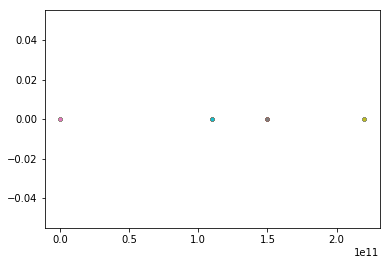

In [178]:
times=np.linspace(0,100,100)

for j in enumerate(times):
#         bodies[i].newx,bodies[i].newy,bodies[i].newz=
    advance_gravity(bodies,timestep=10)
    for i in range(0,len(bodies)):
        print(j[0], bodies[i].name, bodies[i].location.x, bodies[i].location.y)

In [20]:
bodies[1].location.x

0

In [20]:
list(enumerate(bodies))

[(0, <__main__.body at 0x108633e48>),
 (1, <__main__.body at 0x108633ef0>),
 (2, <__main__.body at 0x108633f28>),
 (3, <__main__.body at 0x108633f60>)]

### Blender Python API Scripts

In [19]:
def create_sphere(radius, distance_to_sun, obj_name):
    """
    instantiate a UV sphere with a given radius, 
    at a given distance from the world origin point
    """
    bpy.ops.mesh.primitive_uv_sphere_add(
        radius=1,
        location=(4.2, 0, 0),
    )
    # get object
    obj = bpy.context.object
    # rename the object
    obj.name = obj_name
    # smooth the shading
    bpy.ops.object.shade_smooth()
    # print("Sphere '%s' created." % obj_name)
    # return the object reference
    return obj
